<a href="https://colab.research.google.com/github/jansle2005/Data-Science-Repository/blob/master/Twitter_Scraping_OK_224_02_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Scrapping & Analysis - 22/02/2022 - 07:00h - Quarta-feira de Carnaval

## Instalações de Bibliotecas

In [ ]:
!pip install snscrape
!pip install pandas
!pip install vaderSentiment
!pip install unidecode

## Importa Bibliotecas

In [131]:
import pandas as pd
import numpy as np
import snscrape.modules.twitter as sntwitter
import datetime
from datetime import timedelta
from tqdm.notebook import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

## Input dos Filtros

In [132]:
def day_inc(dia,inc):
  data = datetime.datetime.strptime(dia, '%Y-%m-%d')
  dia_seguinte = data + datetime.timedelta(days=inc)
  data_formatada = dia_seguinte.strftime('%Y-%m-%d')
  return data_formatada

In [133]:
text = input('TEXT da consulta (ou deixe em branco pressionando enter)')
username = input('Digite o(s) NOME(s) de usuário(s) específico(s) de uma conta do Twitter sem @ (ou deixe em branco - enter): ')
data1 = input('DATA1 início aaaa-mm-dd (ou deixe em branco com enter): ')
data2 = input('DATA2 final  aaaa-mm-dd (ou deixe em branco com enter): ')
# Essa alteração a seguir ses faz necessária devido ao método de contagem de dias do snscraper
data2=day_inc(data2,1)

count = int(input('Digite o número máximo de tweets ou digite -1 para recuperar todos os tweets possíveis: '))
retweet ='s' #input('Excluir Retweets? (s/n): ')
replies ='s' #input('Excluir Replies? (s/n): ')

TEXT da consulta (ou deixe em branco pressionando enter)aumento servidor
Digite o(s) NOME(s) de usuário(s) específico(s) de uma conta do Twitter sem @ (ou deixe em branco - enter): 
DATA1 início aaaa-mm-dd (ou deixe em branco com enter): 2023-02-01
DATA2 final  aaaa-mm-dd (ou deixe em branco com enter): 2023-02-23
Digite o número máximo de tweets ou digite -1 para recuperar todos os tweets possíveis: -1


In [134]:
def search(text,username,data1,data2,retweet,replies):
    global filename

    q = text+ ' lang:pt'
   
    if username!='': q += f" from:{username}"   
    if data1=='':   data1 = datetime.datetime.strftime(datetime.datetime.strptime(data2, '%Y-%m-%d') - datetime.timedelta(days=7), '%Y-%m-%d')
    
    q += f" since:{data1}" 
    
    if data2=='': data2 = datetime.datetime.strftime(datetime.date.today(), '%Y-%m-%d')
    
    q += f" until:{data2}"
   
    if retweet == 's':   q += f" exclude:retweets"
    if replies == 's':   q += f" exclude:replies"
    if username!='' and text!='':   filename = f"{data1}_{data2}_{username}_{text}.csv"
    elif username!="":              filename = f"{data1}_{data2}_{username}.csv"
    else:                           filename = f"{data1}_{data2}_{text}.csv"
    
    print(filename)
    print('q FINAL = ',q)
    return q

In [135]:
q=search(text,username,data1,data2,retweet,replies)

2023-02-01_2023-02-24_aumento servidor.csv
q FINAL =  aumento servidor lang:pt since:2023-02-01 until:2023-02-24 exclude:retweets exclude:replies


## Inicia o Scrapping

In [136]:
# ___________________________________________

# Criação da lista  vazia que se fará append de dados de tweet  e do dataframe
tweets_list1 = []
tweets_df1=[]


# Usar TwitterSearchScraper para raspar dados do Tweeter para apensar a uma lista
if count == -1:
    for i,tweet in enumerate(tqdm_notebook(sntwitter.TwitterSearchScraper(q).get_items())):
        tweets_list1.append([tweet.date, 
                             tweet.id, 
                             tweet.rawContent, 
                             tweet.user.username,
                             tweet.user.location,
                             tweet.place,
                             tweet.hashtags,
                             tweet.likeCount])

else:
    with tqdm_notebook(total=count) as pbar:
        for i,tweet in enumerate(sntwitter.TwitterSearchScraper(q).get_items()):
            if i>=count: #number of tweets you want to scrape
                break
            tweets_list1.append([tweet.date, 
                                 tweet.id, 
                                 tweet.rawContent, 
                                 tweet.user.username,
                                 tweet.user.location,
                                 tweet.place,
                                 tweet.hashtags,
                                 tweet.likeCount])
            
            pbar.update(1)

# Criar dataframe partindo da lista criada acima 
tweets_df1 = pd.DataFrame(tweets_list1, columns=['DateTime', 'TweetId', 'Text', 'Username','Local','Place',
                                'Hashtags','LikeCount'])


#___________________________________________

0it [00:00, ?it/s]

In [137]:
tweets_df1.sort_values(by='DateTime')

,DateTime,TweetId,Text,Username,Local,Place,Hashtags,LikeCount
60,2023-02-01 12:30:01+00:00,1620761385138376705,A valorização do servidor público municipal se...,cidadepalmas,"Palmas, Brasil",None,None,8
59,2023-02-01 22:40:30+00:00,1620915020958662656,Não tem valorização do servidor público. No au...,Lilibronze,São Paulo ou Ubatuba,None,[RespeitemAposentados],26
58,2023-02-04 22:01:23+00:00,1621992337311244292,""" servidor de sopa"", não precisa de aumento. ...",MariaDahm,,None,None,0
57,2023-02-06 13:09:20+00:00,1622583222096855040,Depois de 4 anos sem receber aumento como serv...,JoseSan29670185,,None,None,0
56,2023-02-06 18:49:52+00:00,1622668916915937300,uma das maiores inverdades que dizem por aí é ...,rafocarvalho,João Pessoa - PB,None,None,12
...,...,...,...,...,...,...,...,...
4,2023-02-21 11:20:04+00:00,1627991538411208704,"É um ensaio do q será a #PEC32daRachadinha, a ...",jrodrigosp,Belém - PA,None,[PEC32daRachadinha],0
3,2023-02-21 12:27:11+00:00,1628008432409231364,O amigo de vocês falando merda sobre aumento a...,lajeunerusse,"São Paulo, SP",None,None,0
2,2023-02-21 23:04:14+00:00,1628168748669493249,"ATENÇAO SERVIDOR PÚBLICO,agora vcs tem o Presi...",ZeliVanderlei,Brasil,None,None,0
1,2023-02-22 17:25:34+00:00,1628445909066432514,Hoje faço 7 anos como servidor público e de pr...,NetoCrecencio4,,None,None,5


In [138]:
tweets_df1['Place'].fillna(' ', inplace=True)
tweets_df1['Local'].fillna(' ', inplace=True)

print(tweets_df1.dtypes)


DateTime     datetime64[ns, UTC]
TweetId                    int64
Text                      object
Username                  object
Local                     object
Place                     object
Hashtags                  object
LikeCount                  int64
dtype: object


In [139]:
import pandas as pd
# carrega o arquivo com as cidades e UFs
df_cidades = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv')

In [140]:
codigo_uf = {
    11: 'RO', 12: 'AC', 13: 'AM', 14: 'RR', 15: 'PA', 16: 'AP', 17: 'TO',
    21: 'MA', 22: 'PI', 23: 'CE', 24: 'RN', 25: 'PB', 26: 'PE', 27: 'AL', 28: 'SE', 29: 'BA',
    31: 'MG', 32: 'ES', 33: 'RJ', 35: 'SP',
    41: 'PR', 42: 'SC', 43: 'RS',
    50: 'MS', 51: 'MT', 52: 'GO', 53: 'DF'
}

df_cidades['UF'] = df_cidades['codigo_uf'].map(codigo_uf)
df_cidades

## 1956h parte daqui.....

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario,UF
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo,GO
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo,MG
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo,GO
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo,MG
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo,PA
...,...,...,...,...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29,3971,74,America/Sao_Paulo,BA
5566,2517407,Zabelê,-8.07901,-37.1057,0,25,542,83,America/Sao_Paulo,PB
5567,3557154,Zacarias,-21.05060,-50.0552,0,35,2973,18,America/Sao_Paulo,SP
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21,1287,98,America/Sao_Paulo,MA


In [141]:
from unidecode import unidecode
#Função que recebe o nome de uma cidade e retorna o UF correspondente
def get_uf(cidade):
    uf = df_cidades.loc[df_cidades['nome'] == cidade, 'UF'].values[0]
    return uf

tweets_df1['UF1'] = None
for i, tweet in tweets_df1.iterrows():
    for cidade in df_cidades['nome']:
        cidade_sem_acento = unidecode(cidade)
        if cidade_sem_acento.lower() in unidecode(tweet['Local']).lower():
            tweets_df1.at[i, 'UF1'] = get_uf(cidade)

In [142]:
display(tweets_df1)

,DateTime,TweetId,Text,Username,Local,Place,Hashtags,LikeCount,UF1
0,2023-02-22 22:04:11+00:00,1628516026844413955,Valorização do servidor público guabirubense j...,tiago_westarb,"Guabiruba, Brasil",,"[valorizaçãodoservidor, valorizaçãoja, guabiruba]",2,MG
1,2023-02-22 17:25:34+00:00,1628445909066432514,Hoje faço 7 anos como servidor público e de pr...,NetoCrecencio4,,,None,5,None
2,2023-02-21 23:04:14+00:00,1628168748669493249,"ATENÇAO SERVIDOR PÚBLICO,agora vcs tem o Presi...",ZeliVanderlei,Brasil,,None,0,None
3,2023-02-21 12:27:11+00:00,1628008432409231364,O amigo de vocês falando merda sobre aumento a...,lajeunerusse,"São Paulo, SP",,None,0,SP
4,2023-02-21 11:20:04+00:00,1627991538411208704,"É um ensaio do q será a #PEC32daRachadinha, a ...",jrodrigosp,Belém - PA,,[PEC32daRachadinha],0,PA
...,...,...,...,...,...,...,...,...,...
56,2023-02-06 18:49:52+00:00,1622668916915937300,uma das maiores inverdades que dizem por aí é ...,rafocarvalho,João Pessoa - PB,,None,12,PB
57,2023-02-06 13:09:20+00:00,1622583222096855040,Depois de 4 anos sem receber aumento como serv...,JoseSan29670185,,,None,0,None
58,2023-02-04 22:01:23+00:00,1621992337311244292,""" servidor de sopa"", não precisa de aumento. ...",MariaDahm,,,None,0,None
59,2023-02-01 22:40:30+00:00,1620915020958662656,Não tem valorização do servidor público. No au...,Lilibronze,São Paulo ou Ubatuba,,[RespeitemAposentados],26,SP


## Fazer Análise de Sentimento

In [143]:
focus_word=text

### TextBlob

In [144]:
from textblob import TextBlob

# função para calcular o número de palavras em cada tweet
def contar_palavras(tweet):
    return len(tweet.split())

# função para calcular a polaridade do tweet usando TextBlob
def calcular_polaridade(tweet):
    tb = TextBlob(tweet)
    return tb.sentiment.polarity

# função para calcular o sentimento do tweet usando TextBlob
def calcular_sentimento(tweet):
    tb = TextBlob(tweet)
    return tb.sentiment.subjectivity

# adicionar coluna com o número de palavras de cada tweet
tweets_df1['num_palavras_Blob'] = tweets_df1['Text'].apply(contar_palavras)

# adicionar coluna com a polaridade de cada tweet
tweets_df1['polari_Blob'] = tweets_df1['Text'].apply(calcular_polaridade)

# adicionar coluna com o sentimento de cada tweet
tweets_df1['senti_Blob'] = tweets_df1['Text'].apply(calcular_sentimento)

In [145]:
display(tweets_df1)

,DateTime,TweetId,Text,Username,Local,Place,Hashtags,LikeCount,UF1,num_palavras_Blob,polari_Blob,senti_Blob
0,2023-02-22 22:04:11+00:00,1628516026844413955,Valorização do servidor público guabirubense j...,tiago_westarb,"Guabiruba, Brasil",,"[valorizaçãodoservidor, valorizaçãoja, guabiruba]",2,MG,36,0.2,0.300
1,2023-02-22 17:25:34+00:00,1628445909066432514,Hoje faço 7 anos como servidor público e de pr...,NetoCrecencio4,,,None,5,None,14,0.0,0.000
2,2023-02-21 23:04:14+00:00,1628168748669493249,"ATENÇAO SERVIDOR PÚBLICO,agora vcs tem o Presi...",ZeliVanderlei,Brasil,,None,0,None,26,0.0,0.000
3,2023-02-21 12:27:11+00:00,1628008432409231364,O amigo de vocês falando merda sobre aumento a...,lajeunerusse,"São Paulo, SP",,None,0,SP,20,0.0,0.000
4,2023-02-21 11:20:04+00:00,1627991538411208704,"É um ensaio do q será a #PEC32daRachadinha, a ...",jrodrigosp,Belém - PA,,[PEC32daRachadinha],0,PA,45,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2023-02-06 18:49:52+00:00,1622668916915937300,uma das maiores inverdades que dizem por aí é ...,rafocarvalho,João Pessoa - PB,,None,12,PB,40,0.0,0.000
57,2023-02-06 13:09:20+00:00,1622583222096855040,Depois de 4 anos sem receber aumento como serv...,JoseSan29670185,,,None,0,None,44,0.1,0.525
58,2023-02-04 22:01:23+00:00,1621992337311244292,""" servidor de sopa"", não precisa de aumento. ...",MariaDahm,,,None,0,None,11,0.0,0.000
59,2023-02-01 22:40:30+00:00,1620915020958662656,Não tem valorização do servidor público. No au...,Lilibronze,São Paulo ou Ubatuba,,[RespeitemAposentados],26,SP,38,0.0,1.000


### Vander com Focus Word

In [146]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instancia o SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Itera sobre cada texto na coluna "Text"
for index, row in tweets_df1.iterrows():
    text1 = row["Text"]
    
    # Aplica a análise de sentimento do VADER
    sentiment_scores = analyzer.polarity_scores(text1)
    
    # Adiciona o resultado à nova coluna "Sent VANDER"
    tweets_df1.loc[index, "Sent VANDER"] = sentiment_scores["compound"]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [147]:
text

'aumento servidor'

In [148]:
tweets_df1

,DateTime,TweetId,Text,Username,Local,Place,Hashtags,LikeCount,UF1,num_palavras_Blob,polari_Blob,senti_Blob,Sent VANDER
0,2023-02-22 22:04:11+00:00,1628516026844413955,Valorização do servidor público guabirubense j...,tiago_westarb,"Guabiruba, Brasil",,"[valorizaçãodoservidor, valorizaçãoja, guabiruba]",2,MG,36,0.2,0.300,0.0000
1,2023-02-22 17:25:34+00:00,1628445909066432514,Hoje faço 7 anos como servidor público e de pr...,NetoCrecencio4,,,None,5,None,14,0.0,0.000,0.0000
2,2023-02-21 23:04:14+00:00,1628168748669493249,"ATENÇAO SERVIDOR PÚBLICO,agora vcs tem o Presi...",ZeliVanderlei,Brasil,,None,0,None,26,0.0,0.000,-0.5267
3,2023-02-21 12:27:11+00:00,1628008432409231364,O amigo de vocês falando merda sobre aumento a...,lajeunerusse,"São Paulo, SP",,None,0,SP,20,0.0,0.000,0.0000
4,2023-02-21 11:20:04+00:00,1627991538411208704,"É um ensaio do q será a #PEC32daRachadinha, a ...",jrodrigosp,Belém - PA,,[PEC32daRachadinha],0,PA,45,0.0,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2023-02-06 18:49:52+00:00,1622668916915937300,uma das maiores inverdades que dizem por aí é ...,rafocarvalho,João Pessoa - PB,,None,12,PB,40,0.0,0.000,-0.2960
57,2023-02-06 13:09:20+00:00,1622583222096855040,Depois de 4 anos sem receber aumento como serv...,JoseSan29670185,,,None,0,None,44,0.1,0.525,0.1779
58,2023-02-04 22:01:23+00:00,1621992337311244292,""" servidor de sopa"", não precisa de aumento. ...",MariaDahm,,,None,0,None,11,0.0,0.000,0.0000
59,2023-02-01 22:40:30+00:00,1620915020958662656,Não tem valorização do servidor público. No au...,Lilibronze,São Paulo ou Ubatuba,,[RespeitemAposentados],26,SP,38,0.0,1.000,-0.2960


In [149]:
tweets_df1

,DateTime,TweetId,Text,Username,Local,Place,Hashtags,LikeCount,UF1,num_palavras_Blob,polari_Blob,senti_Blob,Sent VANDER
0,2023-02-22 22:04:11+00:00,1628516026844413955,Valorização do servidor público guabirubense j...,tiago_westarb,"Guabiruba, Brasil",,"[valorizaçãodoservidor, valorizaçãoja, guabiruba]",2,MG,36,0.2,0.300,0.0000
1,2023-02-22 17:25:34+00:00,1628445909066432514,Hoje faço 7 anos como servidor público e de pr...,NetoCrecencio4,,,None,5,None,14,0.0,0.000,0.0000
2,2023-02-21 23:04:14+00:00,1628168748669493249,"ATENÇAO SERVIDOR PÚBLICO,agora vcs tem o Presi...",ZeliVanderlei,Brasil,,None,0,None,26,0.0,0.000,-0.5267
3,2023-02-21 12:27:11+00:00,1628008432409231364,O amigo de vocês falando merda sobre aumento a...,lajeunerusse,"São Paulo, SP",,None,0,SP,20,0.0,0.000,0.0000
4,2023-02-21 11:20:04+00:00,1627991538411208704,"É um ensaio do q será a #PEC32daRachadinha, a ...",jrodrigosp,Belém - PA,,[PEC32daRachadinha],0,PA,45,0.0,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2023-02-06 18:49:52+00:00,1622668916915937300,uma das maiores inverdades que dizem por aí é ...,rafocarvalho,João Pessoa - PB,,None,12,PB,40,0.0,0.000,-0.2960
57,2023-02-06 13:09:20+00:00,1622583222096855040,Depois de 4 anos sem receber aumento como serv...,JoseSan29670185,,,None,0,None,44,0.1,0.525,0.1779
58,2023-02-04 22:01:23+00:00,1621992337311244292,""" servidor de sopa"", não precisa de aumento. ...",MariaDahm,,,None,0,None,11,0.0,0.000,0.0000
59,2023-02-01 22:40:30+00:00,1620915020958662656,Não tem valorização do servidor público. No au...,Lilibronze,São Paulo ou Ubatuba,,[RespeitemAposentados],26,SP,38,0.0,1.000,-0.2960


# Gráfico de Barras - Tweets por dia

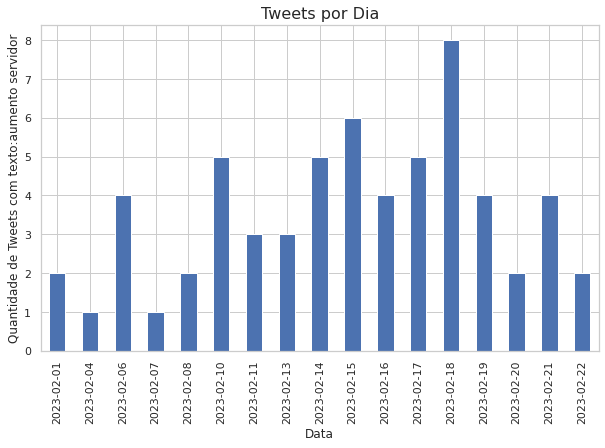

In [150]:
import matplotlib.pyplot as plt
tweets_df1['Date'] = pd.to_datetime(tweets_df1['DateTime']).dt.date

# Cria a Series Datas x Quantidade de tweets
tweets_por_dia = tweets_df1['Date'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10,6))

tweets_por_dia.plot(kind='bar', ax=ax)
ax.set_xticklabels(tweets_por_dia.index, rotation=90)

# Lengendas: Tìtulo, Eixo x e Eixo y
ax.set_title('Tweets por Dia', fontsize=16)
ax.set_xlabel('Data',fontsize=12)
ax.set_ylabel('Quantidade de Tweets com texto:'+ text,fontsize=12)

# Salvar a figura - dever vir antes de plt.show():
data2=day_inc(data2,-1)
nome_arquivo = "BarGraph_Tweets por Datas_" + text + '_DE_' + data1 + '_ATE_' + data2+".png"
plt.savefig(nome_arquivo,dpi=300, bbox_inches='tight')

# Mostrar a figura na console do Python
plt.show()

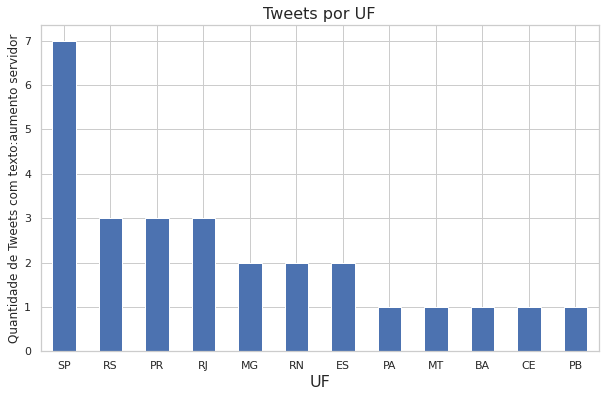

In [151]:
tweets_por_estado = tweets_df1['UF1'].value_counts()
fig, ax = plt.subplots(figsize=(10,6))
tweets_por_estado.plot(kind='bar', ax=ax)
ax.set_xticklabels(tweets_por_estado.index,  rotation=0)
ax.set_title('Tweets por UF', fontsize=16)
ax.set_xlabel('UF',fontsize=16)
ax.set_ylabel('Quantidade de Tweets com texto:'+ text,fontsize=12)
nome_arquivo = "BarGraph_Tweets_por UFs_" + text + '_DE_' + data1 + '_ATE_' + data2+".png"
plt.savefig(nome_arquivo,dpi=300, bbox_inches='tight')
plt.show()


# Nuvem de palavras

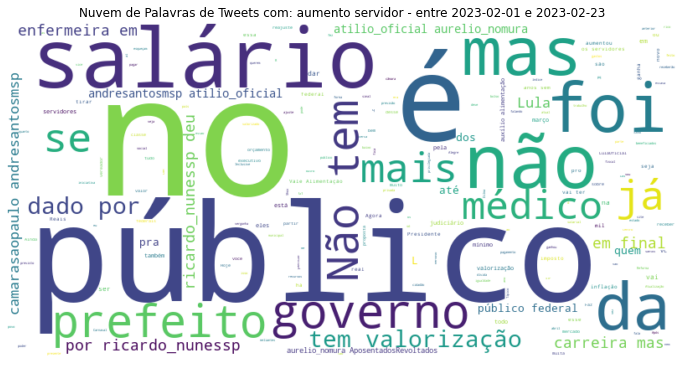

In [152]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

texto = ' '.join(tweets_df1['Text'])
lista_sabida = text.split()
cai_fora = ['como','com','t','que','https', 'co', 'RT', 'para', 'sua', 'de', 'a', 'o', 'seu', 'teu', 'tua', 'minha', 'meu', 'do', 'e', 'um', 'uma', 'pelo'] + lista_sabida
wc = WordCloud(width=800, height=400, background_color='white', max_words=200, stopwords=cai_fora)
wc.generate_from_text(texto)

fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(wc, interpolation='bilinear')
ax.axis('off')

title = "Nuvem de Palavras de Tweets com: " + text + ' - entre ' + data1 + ' e ' + data2
ax.set_title(title, fontsize=12, color='black')

nome_arquivo = "WordCloud_Tweets_com_" + text + '_DE_' + data1 + '_ATE_' + data2+".png"
plt.savefig(nome_arquivo,dpi=300, bbox_inches='tight')
plt.show()

In [153]:
data2

'2023-02-23'

In [155]:
tweets_por_dia


2023-02-01    2
2023-02-04    1
2023-02-06    4
2023-02-07    1
2023-02-08    2
2023-02-10    5
2023-02-11    3
2023-02-13    3
2023-02-14    5
2023-02-15    6
2023-02-16    4
2023-02-17    5
2023-02-18    8
2023-02-19    4
2023-02-20    2
2023-02-21    4
2023-02-22    2
Name: Date, dtype: int64